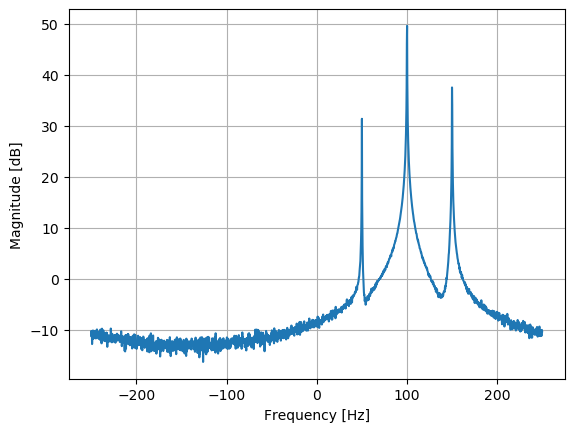

In [1]:
import numpy as np
import matplotlib.pyplot as plt


Fs = 500 # sample rate
Ts = 1/Fs # sample period
N = 2048 # number of samples to simulate

t = Ts*np.arange(N)

x = 40 * np.exp(1j*2*np.pi*50*t) # simulates sinusoid at 50 Hz

y = 400 * np.exp(1j*2*np.pi*100*t) # simulates sinusoid at 100 Hz
w = 100 * np.exp(1j*2*np.pi*150*t) # simulates sinusoid at 150 Hz

n = (np.random.randn(N) + 1j*np.random.randn(N))/np.sqrt(2) # complex noise with unity pow
noise_power = 2


r = (x + y + w) + n * np.sqrt(noise_power)

#r = x 
PSD = (np.abs(np.fft.fft(r))/N)**2
PSD_log = 10.0*np.log10(PSD)
PSD_shifted = np.fft.fftshift(PSD_log)

f = np.arange(Fs/-2.0, Fs/2.0, Fs/N) # start, stop, step


plt.plot(f, PSD_shifted)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.grid(True)
plt.show()